In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
from tqdm.notebook import tqdm

import os

In [3]:
# dirs = os.listdir()

# dirs = [i for i in dirs if '.csv' in str(i)]

# dfs = []
# for i in tqdm(dirs):
#     dfs.append(pd.read_csv(i, low_memory = False))

# dfs = pd.concat(dfs)

# dfs.thread_level.value_counts()

# dfs.to_csv('unlabeled_data.csv')

In [11]:
df = pd.read_csv('unlabeled_data.csv')

/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,4,12,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [14]:
df.isna().sum()

page_id                         0
thread_level                    0
parent_id                       0
post_id                         0
post_text                       0
post_text_raw                   0
post_image                      0
post_video                      0
post_comment_count              0
post_share_count                0
post_reaction_count             0
post_like                       0
post_love                       0
post_haha                       0
post_sorry                      0
post_wow                        0
post_anger                      0
post_utime                      0
comment_text                18171
comment_text_raw            18171
comment_id                  18171
comment_author              18186
comment_author_id           18171
comment_image               18171
comment_video               18171
comment_reaction_count      18171
comment_reaction1         2340143
comment_reaction2         3382136
comment_reaction3         3587113
comment_topfan

In [18]:
df_1 = df[df['page_id'] != '<UNK>']

In [22]:
df_1.loc[:, 'page_id'] = pd.to_numeric(df_1.page_id)

/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
df_1 = df_1[df_1['parent_id'] != '<UNK>']

In [26]:
df_1.loc[:, 'parent_id'] = pd.to_numeric(df_1.parent_id)

In [31]:
df_1 = df_1[df_1['post_reaction_count'] != 'Cannot count all reaction']

In [32]:
df_1.loc[:, 'post_reaction_count'] = pd.to_numeric(df_1.post_reaction_count)

/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [114]:
df_post = df_1[df_1['thread_level'] == 0]

In [117]:
# df_post.to_csv('unlabeled_post.csv')
df_post = pd.read_csv('unlabeled_post.csv'')

In [118]:
df_comment = df_1[df_1['thread_level'] >= 1]

In [119]:
df_comment.isna().sum()

page_id                         0
thread_level                    0
parent_id                       0
post_id                         0
post_text                       0
post_text_raw                   0
post_image                      0
post_video                      0
post_comment_count              0
post_share_count                0
post_reaction_count             0
post_like                       0
post_love                       0
post_haha                       0
post_sorry                      0
post_wow                        0
post_anger                      0
post_utime                      0
comment_text                    0
comment_text_raw                0
comment_id                      0
comment_author                 15
comment_author_id               0
comment_image                   0
comment_video                   0
comment_reaction_count          0
comment_reaction1         2321096
comment_reaction2         3362540
comment_reaction3         3567419
comment_topfan

In [120]:
df_1 = df_comment

In [121]:
df_1.comment_author = df_1.comment_author.fillna('<NONE>')

/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [122]:
a = list(df_1.comment_id)

a = [i.is_integer() for i in a]

In [123]:
df_2 = df_1[a]

In [124]:
df_2.comment_id = df_2.comment_id.apply(int)

In [126]:
df_2.comment_image = df_2.comment_image.apply(int)

In [127]:
df_2.comment_video = df_2.comment_video.apply(int)

In [128]:
def thai_unit_con(s):
    if type(s) == str:
        if 'พัน' in s:
            s = s.replace(' พัน', '')
            s = float(s) * 1000
        elif 'หมื่น' in s:
            s = s.replace(' หมื่น', '')
            s = float(s) * 10000
    try:
        return int(s)
    except:
        pass
    return s

In [129]:
df_2.comment_reaction_count = pd.to_numeric(df_2.comment_reaction_count.apply(thai_unit_con)).apply(int)

In [134]:
a = df_2[df_2.comment_author_id == 'User close an account']

In [135]:
a.comment_author_id = -1

/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [138]:
df_2[df_2.comment_author_id == 'User close an account'] = a

/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [144]:
df_2.comment_author_id = pd.to_numeric(df_2.comment_author_id)

/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [146]:
df_2.comment_author_id = df_2.comment_author_id.apply(int)

/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [148]:
df_2.comment_topfan = df_2.comment_topfan.apply(int)
df_2.comment_reply_count = df_2.comment_reply_count.apply(int)
df_2.comment_utime = df_2.comment_utime.apply(int)

/home/posoma/miniconda3/envs/posoma/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [150]:
df_3 = df_2.reset_index(drop=True)

In [2]:
# df_3.to_csv('df_comment.csv')
df_comment = pd.read_csv('unlabeled_comment.csv')

In [3]:
df_1 = df_comment

In [4]:
reactions = ['like', 'haha', 'sad', 'angry', 'love', 'wow']

for i in reactions:
    df_1[i] = 0
for i in reactions:
    df_1['super_' + i] = 0
for i in reactions:
    df_1['sup_' + i] = 0
    

In [5]:
df_1.comment_reaction1 = df_1.comment_reaction1.fillna('<NONE>')
df_1.comment_reaction2 = df_1.comment_reaction2.fillna('<NONE>')
df_1.comment_reaction3 = df_1.comment_reaction3.fillna('<NONE>')

In [6]:
df_1['reaction_level'] = 0

In [7]:
for i in tqdm(df_1.index):
    if df_1.at[i, 'comment_reaction1'] != '<NONE>':
        df_1.at[i, 'reaction_level'] += 1
    if df_1.at[i, 'comment_reaction2'] != '<NONE>':
        df_1.at[i, 'reaction_level'] += 1
    if df_1.at[i, 'comment_reaction3'] != '<NONE>':
        df_1.at[i, 'reaction_level'] += 1

In [8]:
ratios = {1: [1], 2:[0.6, 0.4], 3:[0.5, 0.3, 0.2]}

for i in tqdm(df_1.index):
    if df_1.at[i,'reaction_level'] != 0:
        ratio = ratios[df_1.at[i,'reaction_level']]
        start = 0
        for j in ratio:
            df_1.at[i, reactions[start]] = j * df_1.at[i, 'comment_reaction_count']
            start+=1

In [9]:
df_2 = df_1[np.logical_not(df_1.duplicated(subset='comment_id'))].reset_index(drop=True)

In [10]:
df_2.set_index('comment_id', inplace=True)

In [11]:
df_2.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df_2.columns = ['page_id', 'thread_level', 'parent_id', 'post_id', 'post_text',
       'post_text_raw', 'post_image', 'post_video', 'post_comment_count',
       'post_share_count', 'post_reaction_count', 'post_like', 'post_love',
       'post_haha', 'post_sad', 'post_wow', 'post_angry', 'post_utime',
       'comment_text', 'comment_text_raw', 'comment_author',
       'comment_author_id', 'comment_image', 'comment_video',
       'comment_reaction_count', 'comment_reaction1', 'comment_reaction2',
       'comment_reaction3', 'comment_topfan', 'comment_reply_count',
       'comment_utime', 'like', 'haha', 'sad', 'angry', 'love', 'wow',
       'super_like', 'super_haha', 'super_sad', 'super_angry', 'super_love',
       'super_wow', 'sup_like', 'sup_haha', 'sup_sad', 'sup_angry', 'sup_love',
       'sup_wow', 'reaction_level']

In [13]:
df_3 = df_2.copy()

In [14]:
# df_3.to_csv('df_3.csv')
df_3 = pd.read_csv('df_3.csv')

In [15]:
for i in tqdm(df_3.index):
    if df_3.at[i, 'parent_id'] == df_3.at[i, 'post_id']:
        for j in reactions:
            df_3.at[i, 'super_' + j] = df_3.at[i, 'post_' + j]
    else:
        try:
            for j in reactions:
                df_3.at[i, 'super_' + j] = df_3.at[df_3.at[i, 'parent_id'], j]
        except:
#             print(i)
            pass

In [16]:
a = df_3[['parent_id']]

In [19]:
parent_child = dict()

In [24]:
reactions

['like', 'haha', 'sad', 'angry', 'love', 'wow']

In [26]:
parent_child

{793187584175583: [793198644174477],
 793041250856883: [793047557522919,
  1417682331678882,
  793155567512118,
  1148297221980649,
  156213421592504,
  1196857453753157,
  244349022738923,
  793050830855925,
  793063094188032,
  793049100856098,
  793050230855985,
  793186830842325,
  793067074187634,
  148371815716203,
  793045274189814,
  793068807520794,
  793087730852235,
  793054814188860,
  793119964182345,
  793098370851171,
  793077457519929,
  793093410851667,
  793060280854980,
  148370129049705,
  793052537522421,
  793130307514644,
  793124607515214,
  793051287522546,
  793212517506423,
  793105047517170,
  793062830854725,
  793047814189560,
  151959152039566,
  793118890849119,
  154398138451739,
  793093697518305,
  793077704186571,
  793142074180134,
  106943623297141,
  793066370854371,
  793052290855779,
  1885979001722612,
  793059777521697,
  793079087519766,
  1920300854898098,
  793160557511619,
  1236644036458685,
  793065540854454,
  793134124180929,
  3295024

In [31]:
for i in reactions:
    df_3['sup_' + i] = 0 

In [34]:
df_3.head(3)

,page_id,thread_level,parent_id,post_id,post_text,post_text_raw,post_image,post_video,post_comment_count,post_share_count,post_reaction_count,post_like,post_love,post_haha,post_sad,post_wow,post_angry,post_utime,comment_text,comment_text_raw,comment_author,comment_author_id,comment_image,comment_video,comment_reaction_count,comment_reaction1,comment_reaction2,comment_reaction3,comment_topfan,comment_reply_count,comment_utime,like,haha,sad,angry,love,wow,super_like,super_haha,super_sad,super_angry,super_love,super_wow,sup_like,sup_haha,sup_sad,sup_angry,sup_love,sup_wow,reaction_level
comment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
793198644174477,634784363349240,2,793187584175583,793041250856883,เฮ้ย!! ทำได้อะ เมื่อวานนี้ 12 ก.ค. 60 ชุดสืบสว...,"<div class=""_5pbx userContent _3576"" data-ft='...",0,1,1,3,19839,17541,30,136,903,930,299,1499925637,เข้าใจแบบนี้เหมือนกัน,"<span class=""_3l3x""><span>เข้าใจแบบนี้เหมือนกั...",โบว์รัก สีดำ,100005521110126,0,0,0,<NONE>,<NONE>,<NONE>,0,0,1499941092,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
793047557522919,634784363349240,1,793041250856883,793041250856883,เฮ้ย!! ทำได้อะ เมื่อวานนี้ 12 ก.ค. 60 ชุดสืบสว...,"<div class=""_5pbx userContent _3576"" data-ft='...",0,1,1,3,19839,17541,30,136,903,930,299,1499925637,ไปทรมานทรกรรมสัตว์ไปเบียดเบียนมันอีกโธ่เอ้ยเกิ...,"<span class=""_3l3x""><span>ไปทรมานทรกรรมสัตว์ไป...",ผาสุข อุณหะกะ,100006655202179,0,0,2,like,<NONE>,<NONE>,0,0,1499925997,2,0,0,0,0,0,17541,136,903,299,30,930,0,0,0,0,0,0,1
1417682331678882,634784363349240,1,793041250856883,793041250856883,เฮ้ย!! ทำได้อะ เมื่อวานนี้ 12 ก.ค. 60 ชุดสืบสว...,"<div class=""_5pbx userContent _3576"" data-ft='...",0,1,1,3,19839,17541,30,136,903,930,299,1499925637,ตำรวจก็เก่งเนอะ จับได้ ล่อซื้อหรอคับ ทำไมเก่ง...,"<span class=""_3l3x""><span>ตำรวจก็เก่งเนอะ จับไ...",เซจ้อย เมืองแห่งพระเจ้า,100008334033451,0,0,1,like,<NONE>,<NONE>,0,0,1500007201,1,0,0,0,0,0,17541,136,903,299,30,930,0,0,0,0,0,0,1


In [35]:
df_post = pd.read_csv('unlabeled_post.csv')

In [39]:
df_post.drop(columns=['Unnamed: 0'], inplace=True)

In [41]:
df_post['comment_id'] = df_post['post_id']

In [45]:
df_post.set_index('comment_id')

,page_id,thread_level,parent_id,post_id,post_text,post_text_raw,post_image,post_video,post_comment_count,post_share_count,post_reaction_count,post_like,post_love,post_haha,post_sorry,post_wow,post_anger,post_utime,comment_text,comment_text_raw,comment_author,comment_author_id,comment_image,comment_video,comment_reaction_count,comment_reaction1,comment_reaction2,comment_reaction3,comment_topfan,comment_reply_count,comment_utime
comment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1575347899292877,634784363349240,0,634784363349240,1575347899292877,#อีจันชวนเที่ยว #มารู้จักหนิงโปกัน เมืองหนิงโป...,"<div class=""_5pbx userContent _3576"" data-ft='...",0,0,13,10,804,797,5,0,0,2,0,1575984600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588794284614905,634784363349240,0,634784363349240,1588794284614905,ผลสลากกินแบ่งรัฐบาลประจำวันที่ 1-12-2562 อย่าล...,"<div class=""_5pbx userContent _3576"" data-ft='...",1,0,22,91,13452,12593,30,262,484,41,42,1577105305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770898433071165,634784363349240,0,634784363349240,770898433071165,#เจาะลึกคดี #เบนซ์เรซซิ่ง,"<div class=""_5pbx userContent _3576"" data-ft='...",0,1,912,1,39456,38091,155,125,77,450,46,1497164400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2135400349837431,634784363349240,0,634784363349240,2135400349837431,ท้องอืด แก้ยังไง? ถึงคนท้องอืด : จาก ป้าปรางค์...,"<div class=""_5pbx userContent _3576"" data-ft='...",0,1,182,1,4903,4811,37,3,0,52,0,1534417200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688915217936154,634784363349240,0,634784363349240,688915217936154,#แกะรอยคดีครูแพะ ภาค 2 . ครูแพะ!!! มาไง???? . ...,"<div class=""_5pbx userContent _3ds9 _3576"" dat...",0,1,1,3,222,219,0,0,2,1,0,1575988215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089910654548603,272609309612079,0,272609309612079,1089910654548603,คดีป้าขวานฟ้าทุบรถ เรียบร้อย จ่ายแต่ค่าปรับ หม...,"<div class=""_5pbx userContent _3576"" data-ft='...",0,0,3,2,22044,20749,349,847,18,78,3,1576661274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300586230147720,272609309612079,0,272609309612079,300586230147720,ไม่ได้ทิ้งเพจ หนีไปไหนนะ แค่พักบ้างเสาร์ทิตย์...,"<div class=""_5pbx userContent _3576"" data-ft='...",0,0,421,40,7070,7070,0,0,0,0,0,1576566000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1170206696518998,272609309612079,0,272609309612079,1170206696518998,มอนิ่งงงงงงงงง เช้าวันหยุดจ้า ฝูงเป็ดออกบินกัน...,"<div class=""_5pbx userContent _3ds9 _3576"" dat...",0,0,960,150,33188,30035,1108,1949,14,68,14,1576632773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_4 = df_3.copy()

In [47]:
parent_child = dict()
for i in tqdm(a.index):
    parent_child[df_4.at[i, 'parent_id']] = []

for i in tqdm(a.index):
    parent_child[df_4.at[i, 'parent_id']].append(i)

In [48]:
err_sum = 0
for i, j in tqdm(parent_child.items()):
    try:
        for l in j:
            for k in reactions:
                df_4.at[i, 'sup_' + k] = df_4.at[i, 'sup_' + k] + df_4.at[l, k]
    except:
        err_sum += 1
        print(err_sum, end = '\r')

59821


In [51]:
df_4.to_csv('df_4.csv')

In [3]:
df_4 = pd.read_csv('df_4.csv')

# Temporal

In [14]:
import time

In [13]:
df_5 = df_4.copy()

In [15]:
a = df_5.comment_utime.apply(lambda t: time.strftime('%Y,%m,%d,%H,%M,%S,%w', time.localtime(t)))

t =  a.str.split(",", n = 7, expand = True)

df_5['comment_year'] = t[0]
df_5['comment_month'] = t[1]
df_5['comment_day'] = t[2]
df_5['comment_hour'] = t[3]
df_5['comment_minute'] = t[4]
df_5['comment_second'] = t[5]
df_5['comment_day_of_week'] = t[6]

In [16]:
a = df_5.post_utime.apply(lambda t: time.strftime('%Y,%m,%d,%H,%M,%S,%w', time.localtime(t)))

t =  a.str.split(",", n = 7, expand = True)

df_5['post_year'] = t[0]
df_5['post_month'] = t[1]
df_5['post_day'] = t[2]
df_5['post_hour'] = t[3]
df_5['post_minute'] = t[4]
df_5['post_second'] = t[5]
df_5['post_day_of_week'] = t[6]

In [2]:
# df_5.to_csv('df_5.csv')
df_5 = pd.read_csv('df_5.csv')

# IsSkoi

(1447, 3)
(482, 3)
(483, 3)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          2432      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 7,201
Trainable params: 7,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
181/181 [==============================] - 15s 81ms/step - loss: 0.4829 - accura

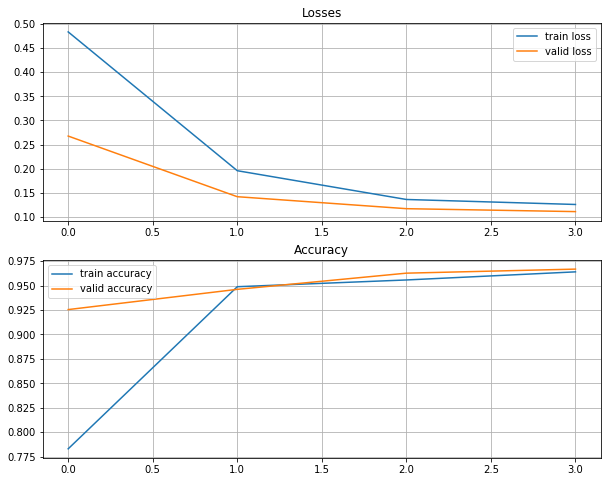

In [22]:

df = pd.read_csv('output_example_19022020_Char_lv.csv');
v = set()
for i in df.text:
    for j in str(i):
        v.add(j)
v = list(v)

def char_proc(s):
    tmp = []
    for c in s:
        if c in v:
            tmp.append(v.index(c))
    return tmp
        
        

df['input_data'] = df.text.apply(char_proc)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4)
df_test, df_valid = train_test_split(df_test, test_size=0.5)

df_train.reset_index(drop=True, inplace=True)
df_valid.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df

print(df_train.shape)
print(df_test.shape)
print(df_valid.shape)

import re
from collections import Counter
from collections import defaultdict
from functools import partial

import emoji
from pythainlp import word_tokenize
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

BATCH_SIZE = 8

def get_data(i, df):
    return df.input_data[i], df['isSkoi'][i]

get_train_data = partial(get_data, df=df_train)
get_valid_data = partial(get_data, df=df_valid)
get_test_data = partial(get_data, df=df_test)

def train_map_fn(i):
    return tf.numpy_function(get_train_data, inp=[i], Tout=(tf.int64, tf.int64))

def valid_map_fn(i):
    return tf.numpy_function(get_valid_data, inp=[i], Tout=(tf.int64, tf.int64))

def test_map_fn(i):
    return tf.numpy_function(get_test_data, inp=[i], Tout=(tf.int64, tf.int64))

train_data = tf.data.Dataset.range(len(df_train)).map(train_map_fn).shuffle(len(df_train))
train_data = train_data.padded_batch(BATCH_SIZE, padded_shapes=([-1], []))
valid_data = tf.data.Dataset.range(len(df_valid)).map(valid_map_fn)
valid_data = valid_data.padded_batch(BATCH_SIZE, padded_shapes=([-1], []))
test_data = tf.data.Dataset.range(len(df_test)).map(test_map_fn)
test_data = test_data.padded_batch(BATCH_SIZE, padded_shapes=([-1], []))


vocab_size = len(v)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16, mask_zero=True))  # เพิ่ม mask_zero=True
model.add(tf.keras.layers.Dropout(0.1))  # regularization
# model.add(tf.keras.layers.GlobalAveragePooling1D())  # เอา avg() ออก

# TODO:
#    1. เปลี่ยนไปใช้ RNN function อื่น เช่น SimpleRNN และ GRU จากนั้นให้เก็บผลการทดลองไว้ใน sheet
#    2. ใช้ bidirectional layer กับ LSTM จากนั้นให้เก็บผลการทดลองไว้ใน sheet เช่นกัน
#       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)))  # ใส่ LSTM() แทน
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))  # fc_1()
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))  #fc_2()

model.summary()

learning_rate = 0.0005
# For binary classification, we use binary_crossentropy
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy'])

num_epochs = 4

history = model.fit(train_data, epochs=num_epochs, validation_data=valid_data)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=2, figsize=(10, 8))

for a in ax:
    a.grid(which='major', axis='both')

ax[0].set_title('Losses')
sns.lineplot(
    range(num_epochs), history.history['loss'], label='train loss', ax=ax[0])
sns.lineplot(
    range(num_epochs), history.history['val_loss'], label='valid loss', ax=ax[0])
ax[1].set_title('Accuracy')
sns.lineplot(
    range(num_epochs), history.history['accuracy'], label='train accuracy', ax=ax[1])
sns.lineplot(
    range(num_epochs), history.history['val_accuracy'], label='valid accuracy', ax=ax[1])

train_results = model.evaluate(train_data, verbose=0)
valid_results = model.evaluate(valid_data, verbose=0)
test_results = model.evaluate(test_data, verbose=0)

print(f'Result  : train   valid   test')
print(f'Loss    : {train_results[0]:.5} {valid_results[0]:.5} {test_results[0]:.5}')
print(f'Accuracy: {train_results[1]:.5} {valid_results[1]:.5} {test_results[1]:.5}')

def tmp_map(i, df_tmp):
    get_tmp_data = partial(get_data, df=df_tmp)
    return tf.numpy_function(get_tmp_data, inp=[i], Tout=(tf.int64, tf.int64))

def tmp_proc(df):
    tmp = pd.DataFrame(list(df), columns=['text'])
    tmp.text = tmp.text.apply(lambda s: s + 'ก')
    tmp['input_data'] = tmp.text.apply(char_proc)
    tmp['isSkoi'] = -1
    tmp_map_fn = partial(tmp_map, df_tmp = tmp)
    tmp_data = tf.data.Dataset.range(len(tmp)).map(tmp_map_fn)
    tmp_data = tmp_data.padded_batch(BATCH_SIZE, padded_shapes=([-1], []))
    return tmp_data


In [23]:
def check_skoi(df):
    return model.predict(tmp_proc(df))

In [60]:
a = df_5

In [61]:
b = a.comment_text

In [62]:
c = check_skoi(b)

In [63]:
c = pd.Series([i[0] for i in c])

In [64]:
d = c.apply(round)

In [65]:
df_5['is_skoi'] = d

In [67]:
df_6 = df_5.copy()

In [121]:
df_6.to_csv('df_6.csv')

In [69]:
import emoji

In [73]:
len(emoji.EMOJI_UNICODE.values())

2811

In [94]:
a = list(df_6.comment_text)

In [95]:
emo_dict = dict()

In [96]:
emo_dict = {i:0 for i in emoji.EMOJI_UNICODE.values()}

In [97]:
for i in tqdm(a):
    for j in emo_dict.keys():
        if j in i:
            emo_dict[j] += 1

In [98]:
sort = {k: v for k, v in sorted(emo_dict.items(), key=lambda item: item[1], reverse=True)}

In [100]:
a = list(sort.items())

In [107]:
b = pd.DataFrame(a[:100], columns=['emoji', 'num'])

In [109]:
b['label'] = 0

In [112]:
b.to_csv('emo.csv')

In [120]:
for j, i in enumerate(b.index):
    print(j, b.iloc[i, 0])

0 😂
1 🤣
2 😁
3 😆
4 😅
5 😭
6 🙄
7 ❤
8 😊
9 😍
10 👍
11 🙏
12 🏻
13 😄
14 😘
15 😏
16 😢
17 🤔
18 ✌
19 😡
20 😒
21 😱
22 👏
23 😑
24 😋
25 😬
26 🤭
27 😥
28 😜
29 🤤
30 😀
31 ☺
32 😤
33 😝
34 😎
35 😔
36 💕
37 🥰
38 😌
39 🙏🏻
40 🤪
41 😉
42 😓
43 😃
44 😠
45 🏼
46 👌
47 😩
48 👍🏻
49 🤗
50 😳
51 ♥
52 😰
53 ♀
54 😣
55 🖕
56 😫
57 🥺
58 🙂
59 🤫
60 🤦
61 📌
62 😞
63 ‼
64 ✌🏻
65 😛
66 🎉
67 💖
68 😚
69 🤬
70 👏🏻
71 😲
72 😈
73 💓
74 😨
75 👎
76 🙈
77 😖
78 🤨
79 👣
80 🤩
81 🔥
82 🙊
83 🤟
84 🐃
85 😕
86 😹
87 🎶
88 🌸
89 💗
90 🐥
91 ♂
92 😙
93 🍓
94 😐
95 😇
96 💋
97 🤦🏻
98 💙
99 😪
